## Intro

<div class="alert alert-success">
This section is up to you and not necessary. 

I would recommend specifing the date you have done the exploration.

in addition you can specify possible problems and doubts regarding both your conclusions and the data itself in this section or in the Coclusions section. (such as biases in data, missing values, small number of samples to support some conclusion, etc)

## Conclusions

<div class="alert alert-success">

**A List of all of your conclusions from the Exploration**
    
No need to specify the actual tests and to explain why you have concluded these things. if the reader wants to deep dive into your tests he will be able to do so further down the notebook.

having said that, **ALWAYS** specify possible problems and doubts regarding both your conclusions and the data itself in this section if they were not mentioned in the Intro! (such as biases in data, missing values, small number of samples to support some conclusion, etc)

</div>

1. ....
2. ....



## Hypothesis & Tests

<div class="alert alert-success">

**This section is where you list out all your assumptions and the way you have tested them.**

It serves both yourself and the reader:
1. The reader - the reader that wants to understand how you have concluded the above conclusions without deep diving into your code.
2. Yourself - It makes it very easy to organize your thoughts and make sure you have tested everything you thought is necessary.

*Keep in mind:*
1. Understand what the data really means in "real life"!!
2. Missing values!
3. Total number of samples
4. Distribution of features
5. Write down all the things you have checked even if they failed - the failure itself may mean allot.
6. Duplicates!

</div>

0. Get an overview of who survived. Isolate those who survived and randomly choose 30 cases.
(re-formulated hypotheses after initial exploration)

1. Hypothesis 1: Higher survival rates in females.
    * test 1: explore the distribution of sex.
    * test 2: compute percentage of surviving per sex. 
    * plot.
2. Hypothesis 2: Higher survival rate for Southhampton embarkment relative to the 2 other stations (I know this turned out as wrong, but I'm mentioning this for didactical purposes).
    * test 1: explore the distribution of embarkment stations.
    * test 2: compute percentage of surviving embarkment station. 
    * plot.
3. Hypothesis 3: Ticket classes are associated with survival rates. I assume that ticket classes are mapped onto specific locations on the ship, which were directly related to the ship's sinking patterns and thus to chances of surviving. 
    * test 1: explore the distribution of ticket class.
    * test 2: compute percentage of surviving per ticket class. 
    * plot.
 
4. Hypothesis 4: Older age is associated with decreased survival rates.
    * test 1: explore the distrbution of age; should it be re-grouped into a few categories, each covering a different range?
    * test 2: compute age stats (mean, median) under the two survival indices; if I turn age to a categorical variable, then
      compute percentage of surviving per age range. 
    * plot.

5. Hypothesis 5: Passengers who travelled alone are less likely to survive.
    * test 1: explore the distribution of 'sibsp' and 'parch'.
    * test 2: text correlation between 'sibsp' and 'parch'. If low - add a new variable based on their summation, 
      "total_kin".
    * test 2: compute percentage of surviving for 'sibsp' and 'parch' (0 vs. >0).
    * plot.

6. Hypothesis 6: Males with families were less likely to survive (i.e. sex by 'sibsp' / 'parch' interaction).
    * test 1: explore the distribution of sex and its combination with 'sibsp' and 'parch'.
    * test 2: compute percentage of surviving for males and females with vs. without 'sibsp' and 'parch' (0 vs. >0).
    * plot.


## Implementation

### Hypotheses 1-2:

Description of test and the hypothesis:
- Data overview.
- Get an overview of survival.
Results and conclusions:
* Data overview:
1) A lot of missing data for cabin. (still worth checking this later on; maybe all passengers in certain cabins drowned together).  
2) ~180 missing cases for age. 
* Survival overview:
1) Females seem to have survived more than men.
2) Embarkation seems related to survival - I see more S than Q and C.
* Exploration of the effects of sex and ebmarkment station on survival:
1) Sex: Females clearly survived more than males.
2) Embarkment:
    - C > Q > S (C=55%, Q=39%, S=34%).
    - However, sample sizes in C and Q are not very large (C=168, Q=77). It's ok in statistical terms, but no great; S's survival rate may fall within the CIs of C and Q given such small datasets.
    - While C is highest, it gives information about surviving at a slightly above-chance rate. Is this relevant?
    - S actually had the lowest survival rate. I initially saw a lot of S in the random surviving sample, but this was misleading since S has the highest proportion. Lesson learned: we should learn about the proportions of categories/sub-levels within a variable before exploring data, in order to avoid wrong inferences. 

In [1]:
# setup and get data:
import numpy as np
import pandas as pd
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

titanic_df = pd.read_csv("train.csv", index_col="PassengerId")
# data overview:
# titanic_df.head(n=20)
print(titanic_df.describe())
print(titanic_df.describe(include=object))


         Survived      Pclass         Age       SibSp       Parch        Fare
count  891.000000  891.000000  714.000000  891.000000  891.000000  891.000000
mean     0.383838    2.308642   29.699118    0.523008    0.381594   32.204208
std      0.486592    0.836071   14.526497    1.102743    0.806057   49.693429
min      0.000000    1.000000    0.420000    0.000000    0.000000    0.000000
25%      0.000000    2.000000   20.125000    0.000000    0.000000    7.910400
50%      0.000000    3.000000   28.000000    0.000000    0.000000   14.454200
75%      1.000000    3.000000   38.000000    1.000000    0.000000   31.000000
max      1.000000    3.000000   80.000000    8.000000    6.000000  512.329200
                                         Name   Sex    Ticket    Cabin  \
count                                     891   891       891      204   
unique                                    891     2       681      147   
top     Meyer, Mrs. Edgar Joseph (Leila Saks)  male  CA. 2343  B96 B98   
fr

In [2]:
# survival overview: 
titanic_df[titanic_df['Survived'] == 1].sample(n=30)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
648,1,1,"Simonius-Blumer, Col. Oberst Alfons",male,56.00,0,0,13213,35.5000,A26,C
272,1,3,"Tornquist, Mr. William Henry",male,25.00,0,0,LINE,0.0000,NaN,S
291,1,1,"Barber, Miss. Ellen ""Nellie""",female,26.00,0,0,19877,78.8500,NaN,S
162,1,2,"Watt, Mrs. James (Elizabeth ""Bessie"" Inglis Mi...",female,40.00,0,0,C.A. 33595,15.7500,NaN,S
249,1,1,"Beckwith, Mr. Richard Leonard",male,37.00,1,1,11751,52.5542,D35,S
866,1,2,"Bystrom, Mrs. (Karolina)",female,42.00,0,0,236852,13.0000,NaN,S
128,1,3,"Madsen, Mr. Fridtjof Arne",male,24.00,0,0,C 17369,7.1417,NaN,S
839,1,3,"Chip, Mr. Chang",male,32.00,0,0,1601,56.4958,NaN,S
586,1,1,"Taussig, Miss. Ruth",female,18.00,0,2,110413,79.6500,E68,S


In [3]:
titanic_df["Sex"].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [4]:
titanic_df.pivot_table(values="Survived", index="Sex", aggfunc='mean')

,Survived
Sex,
female,0.742038
male,0.188908


Text(0, 0.5, 'Survival Rate')

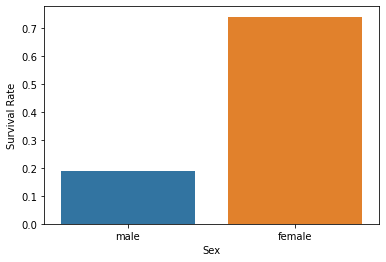

In [5]:
sns.barplot(x=titanic_df["Sex"], y=titanic_df["Survived"], ci=None)
plt.ylabel("Survival Rate")

In [6]:
titanic_df["Embarked"].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [7]:
titanic_df.pivot_table(values="Survived", index="Embarked", aggfunc='mean')

,Survived
Embarked,
C,0.553571
Q,0.389610
S,0.336957


### Hypothesis 3:

Description of test and the hypothesis:
- Ticket class and survival rate.

Results and conclusions:
1) Effect of ticket class on survival rate: 1 > 2 > 3 (1=63%, 2=47%, 3=24%).

In [8]:
titanic_df.Pclass.value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [9]:
titanic_df.pivot_table(values="Survived", index="Pclass", aggfunc='mean')

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


### Hypothesis 4:

Description of test and the hypothesis:
- Older age and lower survival rate.
Results and conclusions:
1) After exploring age and its correlation with survival, I decided to split age into 4 groups: toddler, kid-teen, young adult, adult & old (0-5, 6-15, 16-30, 31-63, >=64 respectively).
2) Toddlers had the highest survival rates (70%) and old people had the lowest (7.7%).
3) Not sure why young adults and audlts didn't differ as strongly as I thought the histogram suggested they did.
4) Suggest to focus on age<=15 and age>=64 as an important cut=off scores.
5) However, there's also a linear trend between age and survival rate, so I'm not completely sure how to treat this variable.
6) Note that there aren't enough samples from the "old" age group (n=14), so treat with caution.


<AxesSubplot:xlabel='Age', ylabel='Count'>

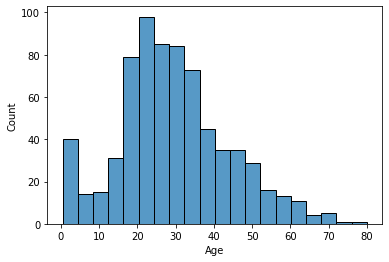

In [10]:
# Age is a continuous variable, lets check its histogram first: 
sns.histplot(titanic_df.Age)

<AxesSubplot:xlabel='Age', ylabel='Count'>

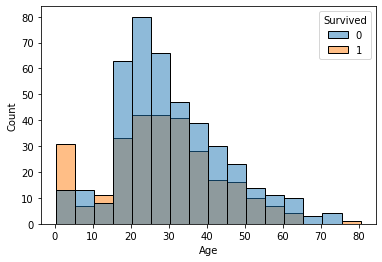

In [11]:
    sns.histplot(data=titanic_df, x='Age', hue='Survived', binwidth=5)

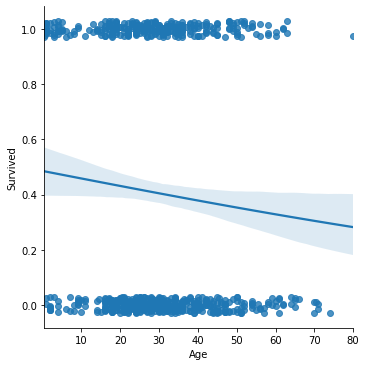

In [12]:
sns.lmplot(x="Age", y="Survived", data=titanic_df,
          logistic=True, y_jitter=.03);

In [13]:
titanic_df.pivot_table(values="Age", index="Survived", aggfunc='mean')

,Age
Survived,
0,30.626179
1,28.343690


In [85]:
# possible age ranges: 0-15, 16-30, 31-80 
def age_cat(row):
    curr_row = row[4]
    if curr_row <= 5:
        return "toddler"
    elif 5 < curr_row <= 15:
        return "kid-teen"
    elif 15 < curr_row <= 30:
        return "young adult"
    elif 30 < curr_row <= 63: 
        return "adult"
    elif curr_row > 63:
        return "old"

In [86]:
titanic_df["Age group"] = titanic_df.apply(age_cat, axis="columns")
titanic_df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age group
PassengerId,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,young adult
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,adult
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,young adult
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,adult
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,adult


In [90]:
titanic_df["Age group"].value_counts()

young adult    326
adult          292
toddler         44
kid-teen        39
old             13
Name: Age group, dtype: int64

In [96]:
titanic_df.pivot_table(values="Survived", index="Age group", aggfunc='mean')

,Survived
Age group,
adult,0.421233
kid-teen,0.461538
old,0.076923
toddler,0.704545
young adult,0.358896


Text(0, 0.5, 'Survival Rate')

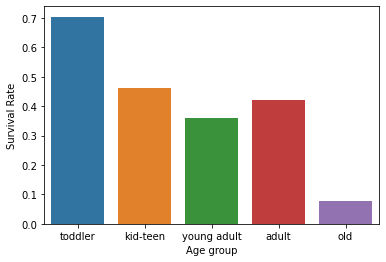

In [118]:
sns.barplot(x=titanic_df["Age group"], y=titanic_df["Survived"], ci=None,
            order=["toddler", "kid-teen", "young adult", "adult", "old"])
plt.ylabel("Survival Rate")

In [119]:
titanic_df.pivot_table(values="Survived", index="Age group", columns="Sex", aggfunc='mean')

Sex,female,male
Age group,,
adult,0.805825,0.211640
kid-teen,0.545455,0.352941
old,NaN,0.076923
toddler,0.761905,0.652174
young adult,0.747826,0.146919


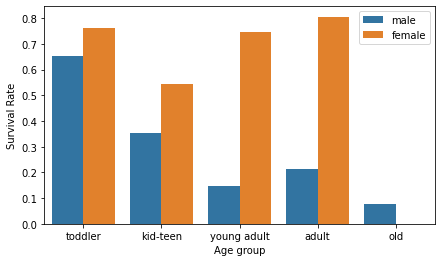

In [136]:
plt.figure(figsize=(7,4))
sns.barplot(x=titanic_df["Age group"], y=titanic_df["Survived"], hue=titanic_df["Sex"], ci=None,
            order=["toddler", "kid-teen", "young adult", "adult", "old"])
plt.ylabel("Survival Rate")
plt.legend(loc="upper right")


In [156]:
titanic_males = titanic_df[titanic_df["Sex"] == 'male']

<AxesSubplot:xlabel='Age', ylabel='Count'>

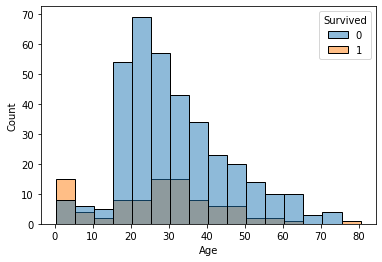

In [159]:
sns.histplot(data=titanic_males, x='Age', hue='Survived', binwidth=5)

<AxesSubplot:xlabel='Age', ylabel='Count'>

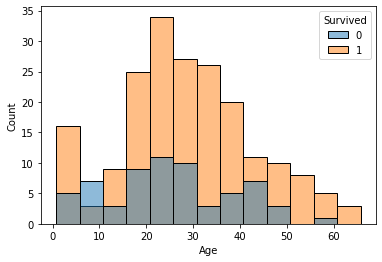

In [160]:
titanic_females = titanic_df[titanic_df["Sex"] == 'female']
sns.histplot(data=titanic_females, x='Age', hue='Survived', binwidth=5)

In [161]:
def age_cat_b(row):
    curr_row = row[4]
    if curr_row <= 5:
        return "toddler"
    elif 5 < curr_row <= 15:
        return "kid-teen"
    elif curr_row > 15:
        return "adult"

In [162]:
titanic_df["Age group b"] = titanic_df.apply(age_cat_b, axis="columns")
titanic_df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age group,Age group b
PassengerId,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,young adult,adult
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,adult,adult
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,young adult,adult
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,adult,adult
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,adult,adult


In [163]:
titanic_df.pivot_table(values="Survived", index="Age group b", columns="Sex", aggfunc='mean')

Sex,female,male
Age group b,,
adult,0.775229,0.174334
kid-teen,0.545455,0.352941
toddler,0.761905,0.652174


### Hypothesis 5:

Description of test and the hypothesis:
- Those who travelled alone were less likely to survive.

Results and conclusions:
> ...

In [97]:
titanic_df["SibSp"].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [98]:
titanic_df.pivot_table(values="Survived", index="SibSp", aggfunc='mean')

,Survived
SibSp,
0,0.345395
1,0.535885
2,0.464286
3,0.250000
4,0.166667
5,0.000000
8,0.000000


In [99]:
titanic_df["Parch"].value_counts()

0    678
1    118
2     80
3      5
5      5
4      4
6      1
Name: Parch, dtype: int64

In [100]:
titanic_df.pivot_table(values="Survived", index="Parch", aggfunc='mean')

,Survived
Parch,
0,0.343658
1,0.550847
2,0.500000
3,0.600000
4,0.000000
5,0.200000
6,0.000000


In [148]:
titanic_df.corr(method='kendall')

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.323533,-0.043385,0.085915,0.133933,0.266229
Pclass,-0.323533,1.000000,-0.286081,-0.039552,-0.021019,-0.573531
Age,-0.043385,-0.286081,1.000000,-0.142746,-0.200112,0.093249
SibSp,0.085915,-0.039552,-0.142746,1.000000,0.425241,0.358262
Parch,0.133933,-0.021019,-0.200112,0.425241,1.000000,0.330360
Fare,0.266229,-0.573531,0.093249,0.358262,0.330360,1.000000


In [149]:
sibsp_mask.corr(method='kendall')

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.308879,-0.079398,0.161260,0.211652,0.300586
Pclass,-0.308879,1.000000,-0.262209,-0.127502,-0.094019,-0.625502
Age,-0.079398,-0.262209,1.000000,-0.040745,-0.117490,0.141113
SibSp,0.161260,-0.127502,-0.040745,1.000000,0.312922,0.331980
Parch,0.211652,-0.094019,-0.117490,0.312922,1.000000,0.297141
Fare,0.300586,-0.625502,0.141113,0.331980,0.297141,1.000000


In [150]:
parch_mask.corr(method='kendall')

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.322667,-0.037730,0.090163,0.152040,0.275352
Pclass,-0.322667,1.000000,-0.297201,-0.044096,-0.042091,-0.586252
Age,-0.037730,-0.297201,1.000000,-0.157517,-0.242355,0.083995
SibSp,0.090163,-0.044096,-0.157517,1.000000,0.424193,0.355974
Parch,0.152040,-0.042091,-0.242355,0.424193,1.000000,0.324923
Fare,0.275352,-0.586252,0.083995,0.355974,0.324923,1.000000
